In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Semana 6. Clase 9: Sistemas y suma de convolución</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### Ejercicio: Evaluación analítica de la suma de convolución.
> + Consideremos un sistema con respuesta impulso:
$$
\begin{align*}
h[n] &= u[n]-u[n-N] \\
& =\begin{cases}
1 & \text{para } 0\leq n \leq N-1 \\
0 & \text{otro caso}
\end{cases} 
\end{align*}
$$
> donde $u[n]$ es un escalón unitario centrado en cero.
> + La entrada es $x[n]=a^{n}u[n]$.
> + Encontrar la respuesta en un índice $n$ particular.
> + Sugerencias: 
>> + Formar las sumas sobre todos los $k$ de los productos $x[k] \cdot h[n-k]$. Dibujar usando Python: $x[n]$ y $h[n-k]$ para: 1) un $n$ entero negativo; 2) $0\leq n$ y $n-(N+1)\leq 0$, y 3) $0<n-N+1$, ó, $N-1<n$
> + Usar la formula general:
$$
\begin{align*}
\sum_{k=N_{1}}^{N_{2}}\alpha^{k} &= \frac{\alpha^{N_{1}}- \alpha^{N_{2}+1}}{1-\alpha},\quad N_{2}\geq N_{1}
\end{align*}
$$


### 1. Solución: 
> + Vamos a identificar lo que tenemos:
> + Un sistema LTI:
<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="SISTEMALTI.png" width="380" height="380" alt="Tiny"></a>
    <strong>Figure 1. Sistema LTI en tiempo discreto.</strong>

> + La respuesta impulso del sistema dada por: $h[n]= u[n]-u[n-N]$.
    
> + La entrada al sistema:
$$
\begin{align*}
x[n] &= \alpha^{n}u[n]\\
& =\begin{cases}
\alpha^{n} & \text{para } 0\leq n\\
0 & \text{otro caso}
\end{cases} 
\end{align*}
$$ 
> + Nos piden encontrar la salida:
$$
\begin{align*}
y[n] &= x[n]*h[n] \\
     & = \sum_{k=-\infty}^{\infty}x[k]h[n-k]
\end{align*}
$$    
> + Lo que nos está diciendo esta ecuación es que para obtener una muestra de la salida para todos los posibles valores de n, debemos **sumar** ($-\infty < k < \infty$), los **productos** de las dos secuencias involucradas, $x[k]$ y $h[n-k].$ Esto significa que si graficamos ambas secuencias, para que obtengamos un producto distinto de cero, ambas secuencias deberán estar **traslapadas** en el tiempo. 
<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="LibroOppenheimSchafer.png" width="380" height="380" alt="Tiny"></a>
    <strong>Figure 2. Traslape de las dos secuencias en el tiempo.</strong>    
    
> + La **clave** para obtener la salida está en comprender cómo se grafica la secuencia $h[n-k]$, para $-\infty < k < \infty$.
> + Para comprender ésto, vamos a basarnos en un método llamado **Método Gráfico**.
> + Éste involucra los siguientes pasos:
>> + 1. Plotear las secuencias $x[k]$ y $h[k]$ como funciones de una variable independiente $k$, de tiempo.
>> + 2. Escoger una de las secuencias, en este caso vamos a usar $h[k]$, e **invertirla en el tiempo**, esto es, $h_{1}[k]=h[-k],$ **en torno a $k=0.$** Por ejemplo, en nuestro caso, si suponemos que $N=5,$ tendremos la siguiente figura:
<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="Invertida2.png" width="480" height="480" alt="Tiny"></a>
    <strong>Figure 3. Tiempo invertido para $h[-k]$ en torno a $k=0$.</strong>
    
>> + 3. Crear una versión _shifteada_ en $n$ muestras de la secuencia de tiempo invertido: $h_{2}[k]=h_{1}[k-n]= h[-(k-n)]= h[n-k]$. Notar que si $n>0$ el _shifteo_ será hacia la derecha, mientras que si $n<0$, el _shifteo_ será hacia la izquierda.
>> + 4. **Multiplicar** las dos secuencias $x[k]$ y $h[n-k]$ y **sumar** el producto para $-\infty < k < \infty$. Este proceso se repite para todos los _shifteos_ posibles de $n$.
>> + 5. Claramente, si no se produce ningún traslape la salida será **cero**.

### 2. Realizar las gráficas de las dos secuencias:
> + Plotear $x[k]$ y $h[n-k]$ sobre un mismo eje de la variable independiente $k$. Para comenzar, la secuencia $h[n-k]$ plotearla para un $n$ negativo, como se puede ver en (a), en la parte alta de la Figura 2.
> + Se observa de inmediato que para el caso en que $n<0$, la salida $y[n]=0$, porque en no hay traslape entre las dos secuencias y, por lo tanto, no hay productos que multiplicar ni tampoco nada que sumar.
> + Luego, plotear el caso en que $n\geq 0$ $\&$ $n-(N-1) \leq 0$ como se ve en (b) en la Figura 2. En este caso, ambas desigualdades forman una sola desigualdad: $0 \leq n \leq (N-1)$. Por lo tanto, $k$ está acotado en el intervalo: $0 \leq k \leq n$, que es donde sí existe traslape de ambas secuencias:
    >> + Si $0 \leq n \leq (N-1)$ entonces $x[k]h[n-k]= a^{k}$. Y la salida será:

$$
\begin{align*}
y[n] &= x[n]*h[n] \\
     & = \sum_{k=0}^{n}x[k]h[n-k], \quad {\text{para:}} \,\,0 \leq n \leq (N-1)\\
     &= \sum_{k=0}^{n} a^{k}\\
     & = \frac{1-a^{n+1}}{1-a}, \quad {\text{para:}} \,\,0 \leq n \leq (N-1)
\end{align*}
$$  

>> + Si ahora, $0 < n-(N-1)$, o bien, $N-1<n$, como se ilustra en (c) en la Figura 2, entonces $x[k]h[n-k]= a^{k}$, para $n-(N-1) \leq k \leq n$, entonces:
$$
\begin{align*}
y[n] &= x[n]*h[n] \\
     & = \sum_{k=n-(N-1)}^{n}x[k]h[n-k], \quad {\text{para:}} \,\, N-1 < n\\
     &= \sum_{k=n-(N-1)}^{n} a^{k}\\
     & = a^{n-(N-1)}\cdot\frac{1-a^{N}}{1-a}, \quad {\text{para:}} \,\,N-1 < n
\end{align*}
$$
> + Por lo tanto,
$$
\begin{align*}
y[n] & =\begin{cases}
0 & \text{para } n<0\\
\frac{1-a^{n+1}}{1-a} & \text{para} \,\,0 \leq n \leq (N-1)\\
a^{n-(N-1)}\cdot\Big(\frac{1-a^{N}}{1-a}\Big) & \text{para} \,\,N-1 < n
\end{cases} 
\end{align*}
$$     

31
31


/home/kasparov/.local/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

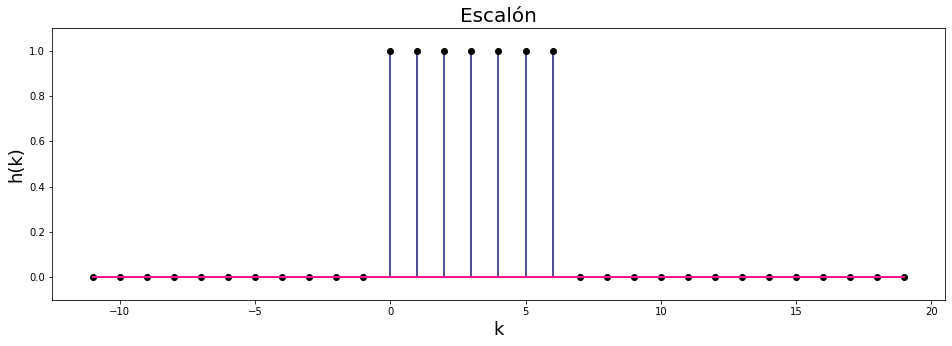

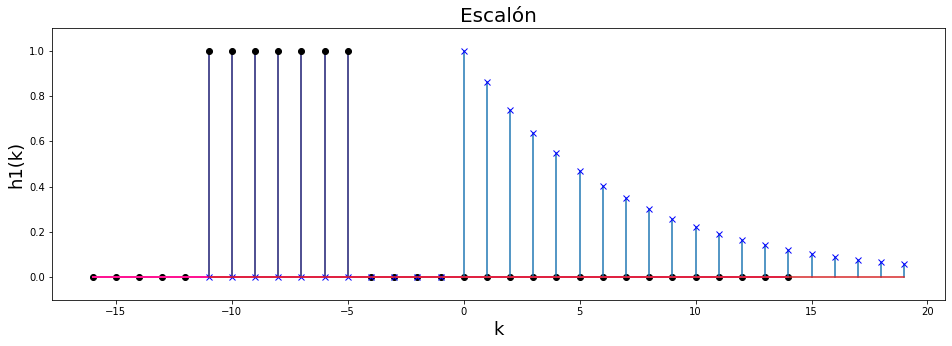

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#1. ESCALÓN
s=0
p=7
m=s+p
t=11
k=np.arange(-11,20)
print(len(k))
z=[]
for i in range(len(k)):
    if k[i]<s:
        b=0
    if k[i]>=s and k[i]<m:
        b=1
    if k[i]>=m:
        b=0
    z.append(b)
plt.figure(figsize=(16,5))
markerline, stemlines, baseline = plt.stem(k, z,linefmt='midnightblue',markerfmt='ko',use_line_collection=True)
plt.xlabel('k',fontsize=18)
plt.ylabel('h(k)',fontsize=18)
plt.title('Escalón',fontsize=20)
plt.ylim(-0.1,1.1)
plt.setp(baseline, color='deeppink',linewidth=2)
#2. ESCALÓN FLIPEADO
j=-5 #j es lo que se correrá el escalón flipeado
c=[]
for i in range(len(k)):
    if k[i]>s and k[i]<m:
        b=0
    if k[i]<=s and k[i]>-m:
        b=1
    if k[i]>=m:
        b=0
    c.append(b)
j2=k+j
plt.figure(figsize=(16,5))
markerline, stemlines, baseline = plt.stem(j2, c,linefmt='midnightblue',markerfmt='ko',use_line_collection=True)
plt.xlabel('k',fontsize=18)
plt.ylabel('h1(k)',fontsize=18)
plt.title('Escalón',fontsize=20)
plt.ylim(-0.1,1.1)
plt.setp(baseline, color='deeppink',linewidth=2)
#3. CAMINO A EXPONENCIAL
z2=[]
for i in range(len(k)):
    if k[i]<s:
        b=0
    if k[i]>=s and k[i]<m:
        b=1
    z2.append(b)
k1=np.arange(-11,20)
dif=len(k1)-len(z2)

ones=np.ones(dif)
z1=np.concatenate((z2,ones))
print(len(z1))
#4. EXPONENCIAL
a=0.86
x=[]
for i in range(len(k1)):
    x1=(a**k1[i])*z1[i]
    x.append(x1)
plt.stem(k1,x,markerfmt='bx')